<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# Herramientas de Visualizacion en Qiskit

Importamos las librerias iniciales

In [1]:
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

## Visualizacion de Circuitos con el methodo .draw()

El método `draw()` de la clase QuantumCricuit nos permite ver una representacion de un circuito cuántico.

Hay varios estilos de visualizacion que pueden seleccionarse con el parámetro output `('text', 'mpl', 'latex', 'latex_source')`

Mas informacion en [qiskit.circuit.QuantumCircuit.draw](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.draw.html?highlight=draw)

### EJERCICIO

Crea un circuito y dibujalo utilizando las siguientes opciones:

* output='mpl'
* initial_state=True
* plot_barriers=True
* reverse_bits=True
* fold=2

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


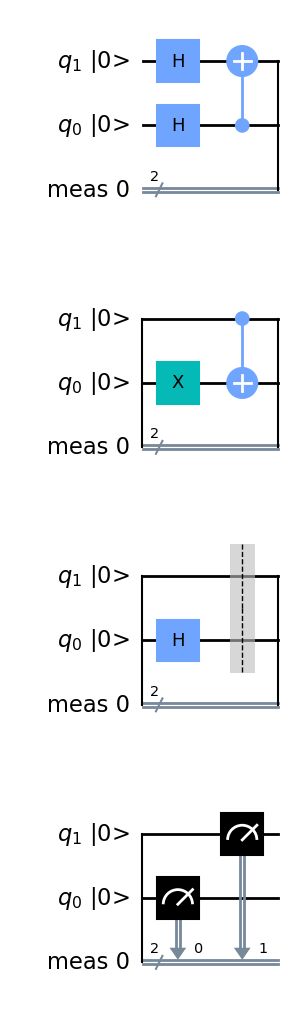

In [2]:
# Creamos un circuito 
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister

circuit = QuantumCircuit(2)

circuit.h([0,1])
circuit.cx(0,1)
circuit.x(0)
circuit.cx(1,0)
circuit.h([0])

circuit.measure_all()

circuit.draw(output="mpl",initial_state=True,plot_barriers=True,reverse_bits=True,fold=2)

### EJERCICIO

Crear un bucle que genere todas la visualizacion del circuito anterior con todos las opciones de tipos de visualizacion de salida posibles

┌───┐     ┌───┐┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■──┤ X ├┤ X ├┤ H ├─░─┤M├───
        ├───┤┌─┴─┐└───┘└─┬─┘└───┘ ░ └╥┘┌─┐
   q_1: ┤ H ├┤ X ├───────■────────░──╫─┤M├
        └───┘└───┘                ░  ║ └╥┘
meas: 2/═════════════════════════════╩══╩═
                                     0  1

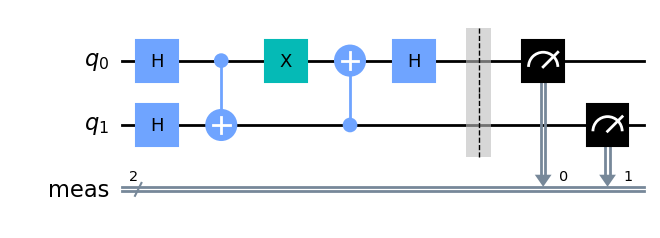

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/latex.py:154: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, _ = load_style(style)


'\\documentclass[border=2px]{standalone}\n\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document}\n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{{q}_{0} :  } & \\lstick{{q}_{0} :  } & \\gate{\\mathrm{H}} & \\ctrl{1} & \\gate{\\mathrm{X}} & \\targ & \\gate{\\mathrm{H}} \\barrier[0em]{1} & \\qw & \\meter & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{1} :  } & \\lstick{{q}_{1} :  } & \\gate{\\mathrm{H}} & \\targ & \\qw & \\ctrl{-1} & \\qw & \\qw & \\qw & \\meter & \\qw & \\qw\\\\\n\t \t\\nghost{\\mathrm{{meas} :  }} & \\lstick{\\mathrm{{meas} :  }} & \\lstick{/_{_{2}}} \\cw & \\cw & \\cw & \\cw & \\cw & \\cw & \\dstick{_{_{\\hspace{0.0em}0}}} \\cw \\ar @{<=} [-2,0] & \\dstick{_{_{\\hspace{0.0em}1}}} \\cw \\ar @{<=} [-1,0] & \\cw & \\cw\\\\\n\\\\ }}\n\\end{document}'

In [3]:
import pdflatex

Opciones = ["text","mpl","latex_source"]

for i in Opciones:
    display(circuit.draw(output=i))

## Visualizar el histograma con plot_histogram

Para visualizar el histograma de salida de diferentes medidas realizadas sobre un circuito cuántico, utilizamos el simulador `qasm_simulator` o un dispositivo cuantico real.

Los resultados obtenidos pueden visualizarse en un histograma con la función:

`plot_histogram(data)`

Para nuestro ejemplo de estado de Bell de 2-qubits:

### EJERCICIO

Crea un circuito cuantico ejecutalo en el simulador, imprime el diccionario de resultados de cada medida y haz una figura del histograma de esos resultados

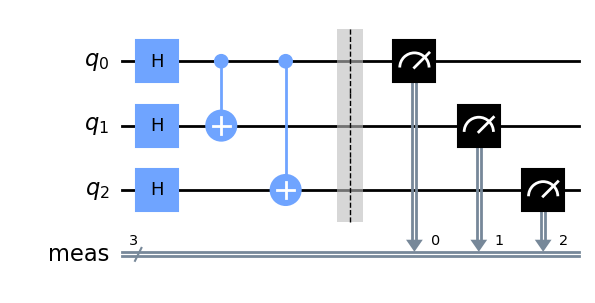

In [4]:
circuit = QuantumCircuit(3)

circuit.h([0,1,2])
circuit.cx(0,1)
circuit.cx(0,2)

circuit.measure_all()

circuit.draw("mpl")

{'100': 263, '001': 268, '110': 245, '101': 238, '010': 257, '000': 265, '011': 240, '111': 224}


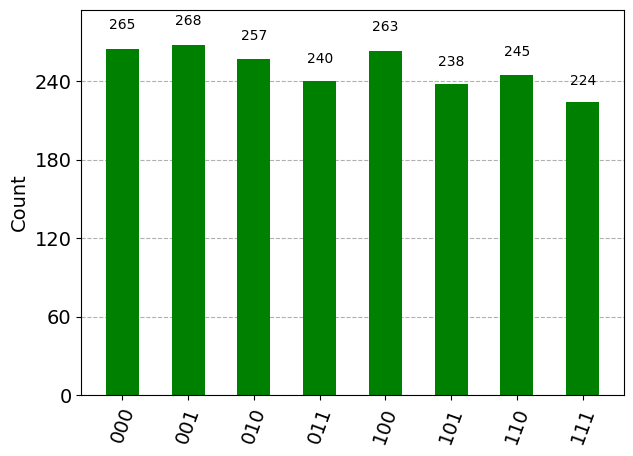

In [5]:
from qiskit.visualization import plot_histogram
from qiskit import Aer

backend = Aer.get_backend("aer_simulator")
result = execute(circuit,backend,shots = 2000).result()
print(result.get_counts())
counts = result.get_counts()

plot_histogram(counts,color="green")



### Opciones de plot_histogram

La funcion `plot_histogram()` tiene algunas [opciones](https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_histogram#qiskitvisualizationplot_histogram) que nos permiten ajustar el grafico de salida:

- `legend` nos permite pasarle a la funcion una lista de cadenas con las etiquetas de diferentes ejecuciones. Es util cuando se representan histogramas resultado de varias ejecuciones

- `sort` para definir el orden en el que se muestran las barras del histograma. Puede ser `asc` para orden creciente y `desc` para descendente

- `number_to_keep` toma un entero que determina el numero de terminos que se mostrara en el histograma. el resto se muestra de forma agrupada.

- `color` para ajustar los colores de las barras con un listado de cadenas de colores

- `bar_labels` para ajustar si las etiquetas se mostrarán sobre las barras o no.

- `figsize` toma una pareja de valores enteros, en la forma `(int,int)` con el tamaño en pulgadas de la anchura y altura de la figura


#### EJERCICIO

Revisa la documentacion de la librería de [visualizacion](https://docs.quantum.ibm.com/api/qiskit/visualization#visualizations) de Qiskit .

Crea un circuito, o toma el circuito anterior y haz dos ejecuciones. Representa en un histograma el resultado de ambas ejecuciones

{'001': 125, '111': 101, '011': 126, '101': 113, '110': 163, '100': 115, '000': 148, '010': 133}
{'001': 122, '010': 117, '000': 145, '100': 124, '011': 116, '111': 136, '101': 145, '110': 119}


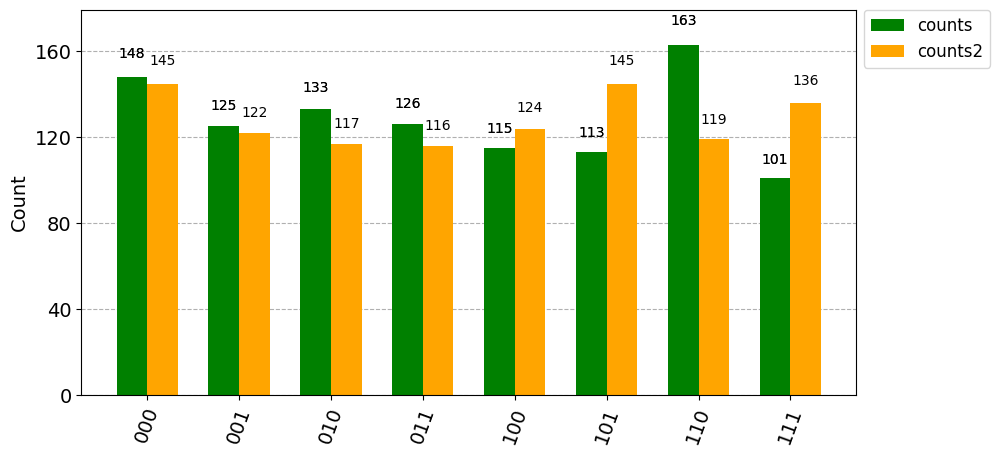

In [6]:
from qiskit.visualization import plot_histogram
from qiskit import Aer

backend = Aer.get_backend("aer_simulator")
result = execute(circuit,backend,shots = 1024).result()
print(result.get_counts())
counts = result.get_counts()

result = execute(circuit,backend,shots = 1024).result()
print(result.get_counts())
counts2 = result.get_counts()

plot_histogram([counts,counts2],legend=["counts","counts2"],color=["green","orange"],figsize=[10,5])

### Guardando la salida plot_histogram() en una figura

La funcion `plot_histogram()` devuelve un objeto de tipo figura llamado `matplotlib.Figure` que podemos guardar en un fichero com el metodo `.savefig('path\out.png')`. Podemos utilizar diferentes formatos de imagen como `.jpeg`, `png`, etc

#### EJERCICIO

Para los resultados de dos ejecuciones del circuito del estado de Bell, prueba la funcion `plot_histogram` con las siguientes opciones:

- `legend` con valores de 'Primera Ejecucion' y 'Segunda Ejecucion'
- `color` con colores 'orange' y 'black'
- `sort` descendente
- `bar_labels` suprimidos
- `figsize` de 15 pulgadas de ancho y 12 de alto

Muestra la grafica por pantalla con la funcion __display()__ guarda el resultado con el metodo __savefig()__ en una figura que se llame 'resultados_estado_Bell.png'

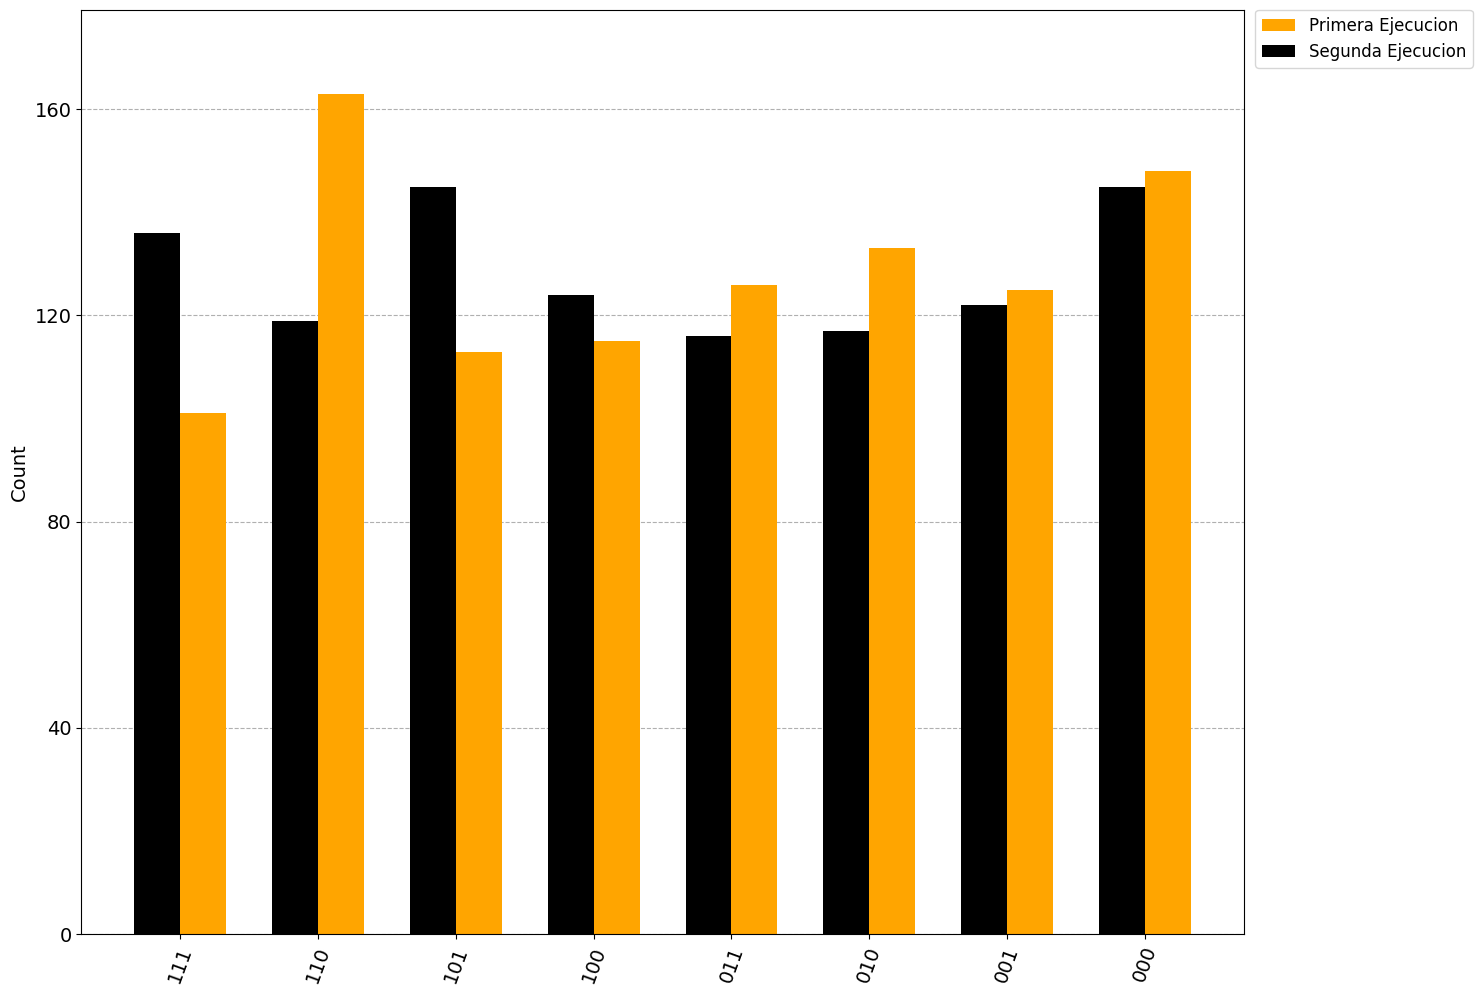

In [7]:
plot_histogram([counts,counts2],legend=["Primera Ejecucion","Segunda Ejecucion"],color=["orange","black"],sort="desc",bar_labels=False,figsize=(15,12))

## Visualizacion de los Estados Cuánticos

En muchas ocasiones necesitamos visualizar el estado cuántico en el que se encuentra el computador. Puede ser util para comprender como evoluciona el estado en un circuito y realizar depuracion de un algoritmo o programa cuántico.

Esta visualización, realizada en un computador clásico requiere potencia de calculo exponencial en relacion con el número de qubits que tiene nuestro estado. Es, por lo tanto, una operacion bastante costosa y no se recomienda realizarla para circuitos de muchos qubits.

En Qiskit se utilizan las siguientes funciones para generar visualizaciones de un estado cuántico:

```
plot_bloch_vector(bloch_sphere_coord)
plot_state_city(quantum_state)
plot_state_qsphere(quantum_state)
plot_state_paulivec(quantum_state)
plot_state_hinton(quantum_state)
plot_bloch_multivector(quantum_state)
```

Un estado cuántico se describe normalmente como un vector de estado (statevector) $|\psi\rangle$ que es un vector de números complejos y tiene las siguientes visualizaciones posibles:

- `'plot_bloch_vector'`: La vista estandar para un qubit en la esfera de Bloch dadas sus coordenadas cartesianas o polares sobre la esfera
- `'plot_bloch_multivector'`: Proyeccion de un estado de n qubits sobre un espacio de n qubits y visualizacion de cada qubit en una esfera de Bloch
- `'plot_state_qsphere'`: Vista propietaria de Qiskit que describe un estado cuántico de multiples qubits sobre una esfera en la que se muestran la fase (color del estado) y la amplitud (grosor del vector) de cada estado de la base de n qubits. Para estados en superposición se visualizan todos sus componentes de la base computacion

Existen tambien otras visualizaciones que son interesantes para mostrar operadores y la representacion general de un vector de estados visto como una matriz de densidad  $\rho = |\psi\rangle\langle \psi|$. Un operador es una matriz que puede visualizarse con las siguientes funciones:

- `'plot_state_city'`: La visualizacion estandar de operadores como matrices con parte real e imaginaria

- `'plot_state_paulivec'`: La representacion del operador expresado sobre la base de los operadores de Pauli $\rho=\sum_{q=0}^{d^2-1}p_jP_j/d$.

- `'plot_state_hinton'`: Lo mismo que `'city'` pero con el tamaño del elemento representando su valor en la matriz del operador.


### Visualizacion del Estado Cuántico con plot_bloch_vector

La forma estandar de mostrar un vector de estados es utilizar la esfera de Bloch. Esto solo funciona para un qubit y toma como entrada el vector de estados de Bloch en funcion de las coordenadas esfericas (angulos `theta` y `phi`) o con coordenadas cartesianas en $R^3$.

El vector de estados de Bloch se define como $[x = sin(\theta) cos(\phi), y = sin(\theta) sin(\phi), z = cos(\theta)]$, donde $\theta \in [0,\pi]$ y $\phi\in [0,2\pi)$ son los angulos del vector de estados en coordenadas esféricas

Las coordenadas esfericas son:

- `r` la distancia del centro de la esfera de Bloch hasta la superficie, el modulo del vector
- `theta`el angulo que forma con el eje `z` en radianes
- `phi`el angulo que forma con el eje `x` en radianes

#### EJERCICIO

Revisa la documentacion de la funcion [plot_bloch_vector](https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_bloch_vector#qiskitvisualizationplot_bloch_vector) y representa en la esfera de Bloch un vector de estados que tenga un angulo $\theta = \frac{\pi}{2}$ y  $\phi = \frac{\pi}{2}$ en coordenadas esfericas.

Calcula las coordenadas cartesianas del vector de estados en $R^3$ y representalo igualmente en la esfera de Bloc

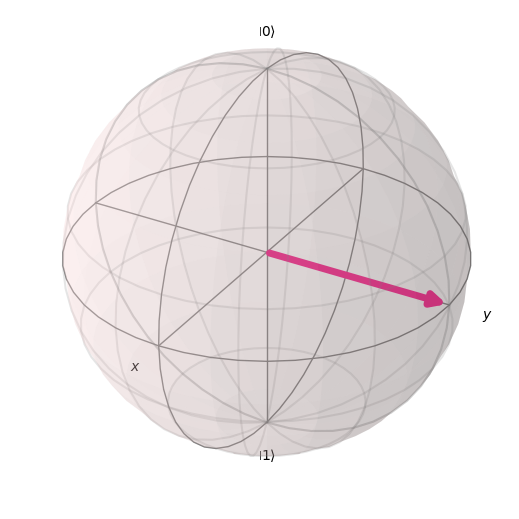

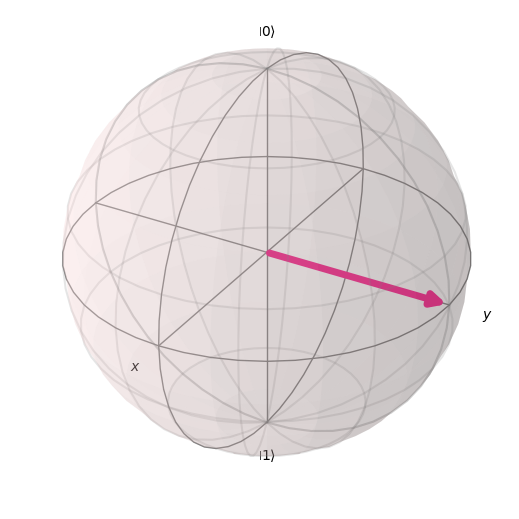

In [8]:
import numpy as np
from qiskit.visualization import plot_bloch_vector

theta = np.pi/2
phi = np.pi/2

#calcula coordenadas cartesianas y esfericas
x = np.sin(phi)*np.cos(theta)
y = np.sin(theta)*np.sin(phi)
z = np.cos(theta)

#representa a partir de coord cart
display(plot_bloch_vector([x,y,z]))

#representa a partir de coord esfericas
display(plot_bloch_vector([1, np.pi/2, np.pi/2], coord_type='spherical'))


#### EJERCICIO

Inspecciona las opciones de la funcion [plot_bloch_vector](https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_bloch_vector#qiskitvisualizationplot_bloch_vector) y crea una representacion de un vector de estados en la esfera de Bloch que tenga un titulo de figura y un tamaño determinado.

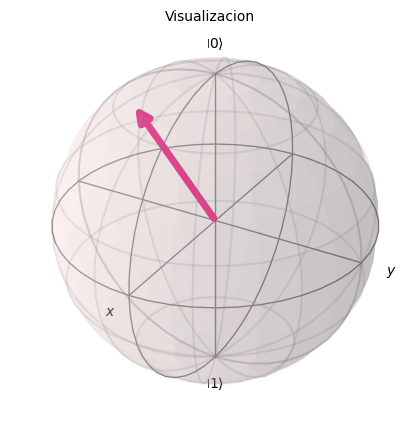

In [9]:
#- **title** (str): una cadena (string) que representa el titulo de la figura
#- **figsize** (tuple): tamaño de la figura en pulgadas (anchura, altura)
plot_bloch_vector([1,np.pi/6,-np.pi/4],coord_type="spherical",title="Visualizacion",figsize=(4,4))

Podemos usar `.savefig('out.png')` para guardar la figura en un fichero

#### EJERCICIO

Representa en la esfera de Bloch los siguientes estados:

- |0>
- |+>
- |i>

Utilizando coordenadas cartesianas y esfericas y guardando las figuras en unas imagenes llamadas 'cero.png', 'mas.png' e 'i.png'

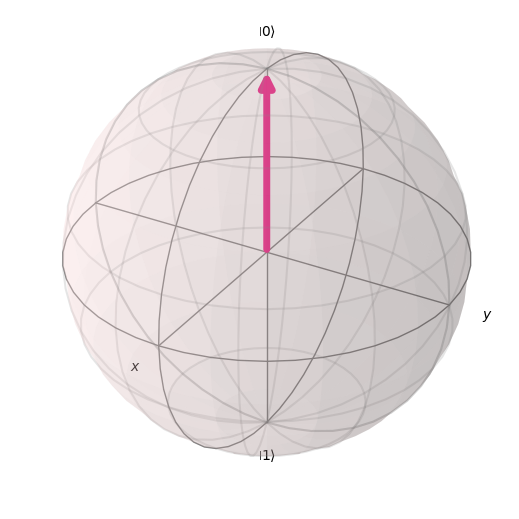

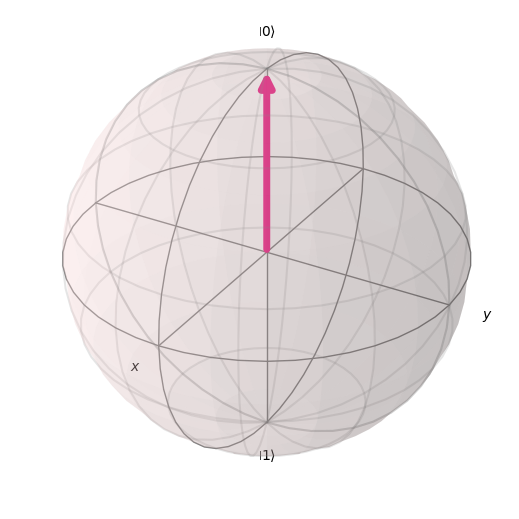

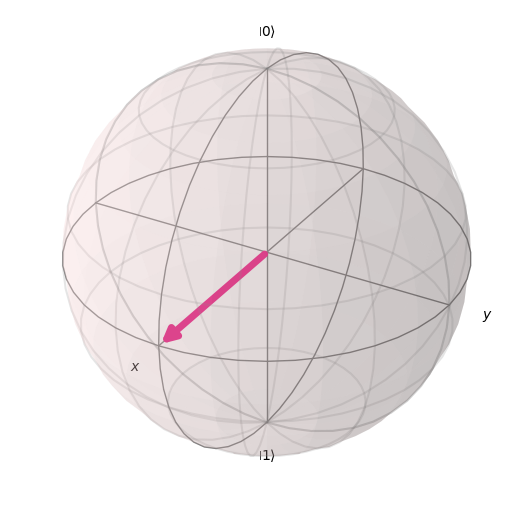

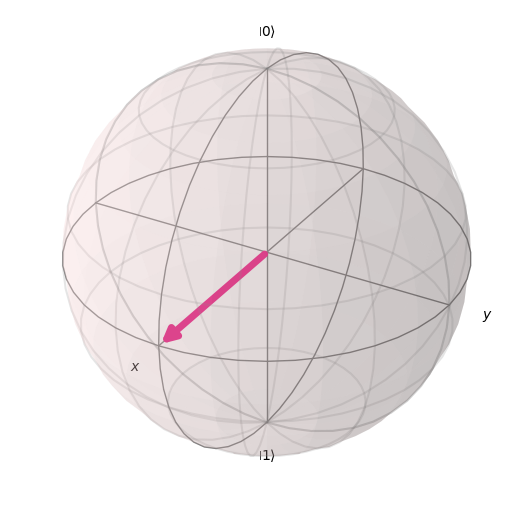

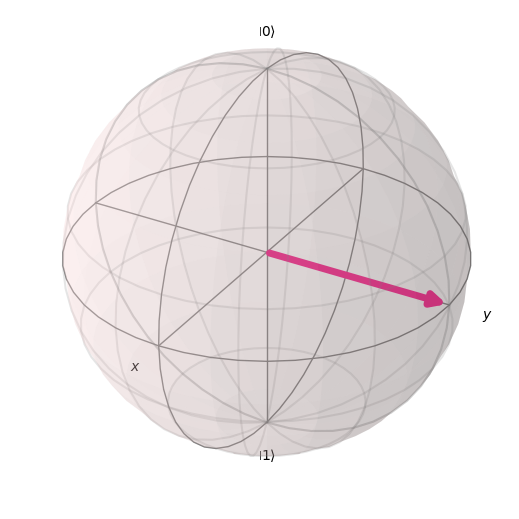

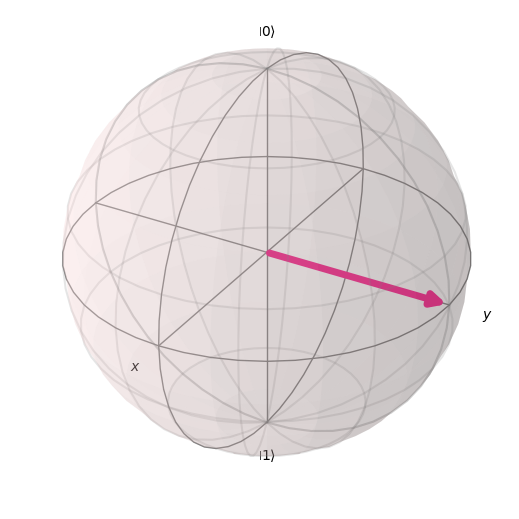

In [10]:
#|0>
#cartesianas
display(plot_bloch_vector([0,0,1]))

#esfericas
display(plot_bloch_vector([1,0,0],coord_type="spherical"))


#|+>
#cartesianas
display(plot_bloch_vector([1,0,0]))

#esfericas
display(plot_bloch_vector([1,np.pi/2,0],coord_type="spherical"))


#|i>
#cartesianas
display(plot_bloch_vector([0,1,0]))

#esfericas
display(plot_bloch_vector([1,np.pi/2,np.pi/2],coord_type="spherical"))

## Visualizacion de un estado de multiples qubits con plot_bloch_multivector

Una forma estandar de mostrar la visualizacion de un estado de multiples qubits es mostrar el estado de cada uno de los qubits en una esfera de Bloch

Para probar esta visualizacion, creemos un estado y visualicemoslo con esta funcion:

#### EJERCICIO

Utiliza la funcion de [random_statevector](https://docs.quantum.ibm.com/api/qiskit/quantum_info#random) del paquete `qiskit.quantum_info` para crear un estado de 3 qubits aleatorio

In [11]:
from qiskit.quantum_info import random_statevector

qubit = random_statevector(8,seed=20210301)

Investiga las funciones de visualizacion [array_to_latex](https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.array_to_latex#qiskitvisualizationarray_to_latex) y [plot_bloch_vector](https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_bloch_multivector#qiskitvisualizationplot_bloch_multivector) para representar visualmente el vector de estados aleatorio

<IPython.core.display.Latex object>

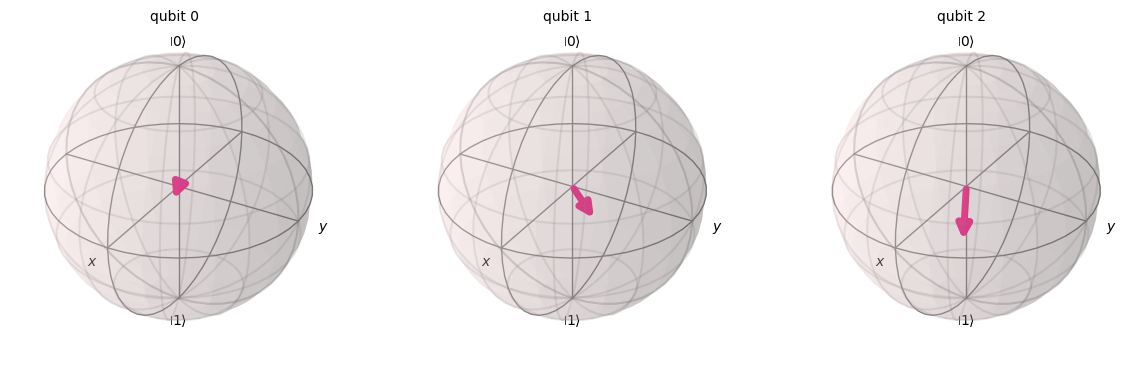

In [12]:
from qiskit.visualization import array_to_latex, plot_bloch_multivector

display(array_to_latex(qubit))
display(plot_bloch_multivector(qubit))

#### EJERCICIO

Crea un vector de estados que tenga dos qubits con los siguientes valores:

* $q_0 = |+>$
* $q_1 = |0>$

y representalo con la visualizacion de `plot_bloch_multivector`.

En la visualizacion prueba la opcion `reverse_bits=True`

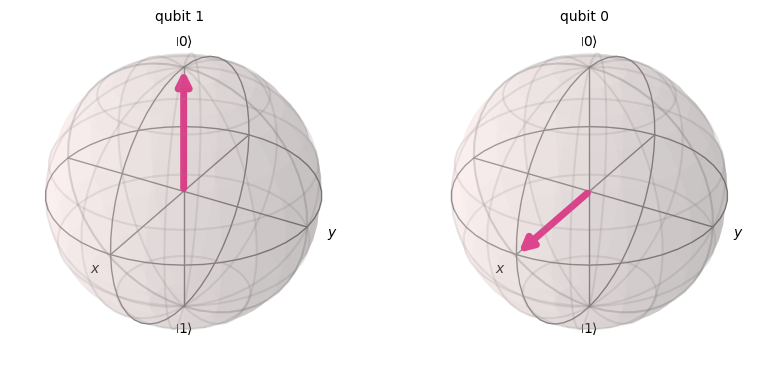

In [13]:
from qiskit.quantum_info import Statevector

qubit = Statevector.from_label("0+")
plot_bloch_multivector(qubit,reverse_bits=True)

Cuando ejecutamos un circuito en un simulador podemos guardar su estado y visualizarlo, en lugar de colapsarlo midiendo y ver los histogramas. De esta forma no perdemos el estado de superposicion ni las fases y podemos visualizar el estado cuantico completo.

Podemos guardar el vector de estados resultado del `QuantumCircuit` con el metodo `save_statevector`y representarlo con estas visualizaciones.

Ten en cuenta que el circuito no puede contener medidas, pues las medidas no son operaciones unitarias y no pueden ser parte de un operador.

#### EJERCICIO

Creamos un vector de estados  $|\psi\rangle= |+0>$ para con un circuito y guardamos el resultado de la ejecucion del circuito en lugar de medirlo.

Ejecutamos la simulacion del circuito y obtenemos el vector de estados del resultado para visualizarlo:

Statevector([0.70710678+0.j, 0.        +0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


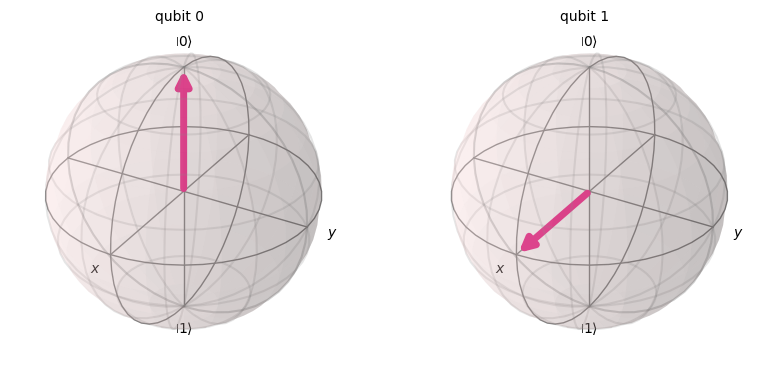

In [14]:
from qiskit import Aer
# Guardando el statevector final
# Construimos un circuito cuantico sin medidas

circuit = QuantumCircuit(2)
#crea el circuito 
#hay que salvar el vector de estados del circuito (en lugar de poner puertas de medida) -> circuit.save_statevector()
circuit.h(1)
circuit.save_statevector()

#realiza la simulacion y obten el vector de estados del resultado -> result.get_statevector()
simulador = Aer.get_backend("aer_simulator")
result = simulador.run(circuit).result()
print(result.get_statevector())

plot_bloch_multivector(result.get_statevector())

#### EJERCICIO

Utiliza las opciones de **plot_bloch_multivector()**:

- **title** (str): una cadena (string) representando el titulo de la figura
- **figsize** (tuple): tamaño de la figura en pulgadas (anchura, altura)

para generar una figura y guardarla en un fichero con el metodo `.savefig('out.png')`

### EJERCICIO

Crea un circuito que cree el estado de Bell de 2 qubits entrelazado $\frac{1}{\sqrt(2)}(|00>+|11>)$ y utiliza el metodo `save_statevector()` de la clase QuantumCircuit para obtener su resultado.

Esta instruccion es equivalente a una medida porque nos permite ejecutar el circuito en el simulador tras realizarla.

Ejecuta el circuito y representalo con la funcion `plot_bloch_multivector()`

Interpreta los resultados

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


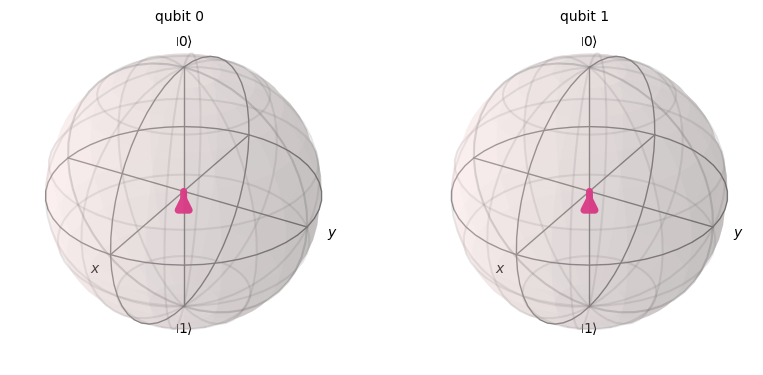

In [15]:
from qiskit import Aer
# Guardando el statevector final
# Construimos un circuito cuantico sin medidas

circuit = QuantumCircuit(2)
#crea el circuito 
#hay que salvar el vector de estados del circuito (en lugar de poner puertas de medida) -> circuit.save_statevector()
circuit.h(0)
circuit.cx(0,1)
circuit.save_statevector()

#realiza la simulacion y obten el vector de estados del resultado -> result.get_statevector()
simulador = Aer.get_backend("aer_simulator")
result = simulador.run(circuit).result()
print(result.get_statevector())

plot_bloch_multivector(result.get_statevector())

## Otras visualizaciones del vector de estados

La librería Qiskit tiene la clase [Statevector](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Statevector#statevector) que nos permite transformar un vector complejo en un vector de estados y utilizar el metodo la propiedad `data` del objeto vector de estados para acceder a sus componentes.

#### EJERCICIO

Crea unas funciones auxiliares que nos ayudan a ver las componentes de un vector de estados de n qubits para poder utilizarlas como visualizacion numerica de las componentes del vector de estados:

In [16]:
import math, cmath

def get_probabilities(svector):
    return np.power(np.abs(svector.data),2)

def get_phases(svector):
    return np.array([math.degrees(cmath.polar(c)[1]) for c in svector.data])

Toma el vector de estados resultado del ejercicio anterior y muestralo como un array en latex, sus probabilidades de medir cada componente de la base y las fases relativas de cada qubit

In [17]:
print(get_probabilities(result.get_statevector()))

print(get_phases(result.get_statevector()))

[0.5 0.  0.  0.5]
[0. 0. 0. 0.]


#### EJERCICIO

Crea un circuito de 2 qubits con las siguientes operaciones:

- aplicar al q[0] la puerta H
- aplicar al q[1] las puertas HTH
- entrelazar ambos qubits con una puerta CNOT con control en q[0] y target q[1]

El circuito es un generador de numeros aleatorios trucado y entrelazado

Muestra el vector de estados en formato matemático LATEX, las probabilidades y las fases del vector de estados resultante

¿Cual es la probalidad de que los dos qubits midan el mismo resultado?

In [18]:
circ = QuantumCircuit(2)

circ.h(0)
circ.h(1)
circ.t(1)
circ.h(1)
circ.cx(0,1)

circ.save_statevector()


simulador = Aer.get_backend("aer_simulator")
result = simulador.run(circ).result()
state = result.get_statevector()

display(state.draw("latex"))
print(get_probabilities(state))
print(get_phases(state))

<IPython.core.display.Latex object>

[0.4267767 0.0732233 0.0732233 0.4267767]
[ 22.5 -67.5 -67.5  22.5]


## Visualizacion del vector de estados con Qsphere

Visualizacion propietaria de IBM en Qiskit que describe un estado cuántico de multiples qubits sobre una esfera en la que se muestran la fase (color del estado) y la amplitud (grosor del vector) de cada estado de la base de n qubits. Para estados en superposición se visualizan todos sus componentes de la base computacion

#### EJERCICIO

Investiga la informacion de la funcion de visualizacion [plot_state_qsphere](https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_state_qsphere#qiskitvisualizationplot_state_qsphere) y representa en ella el estado de Bell de 2 qubits entrelazado $\frac{1}{\sqrt(2)}(|00>+|11>)$.

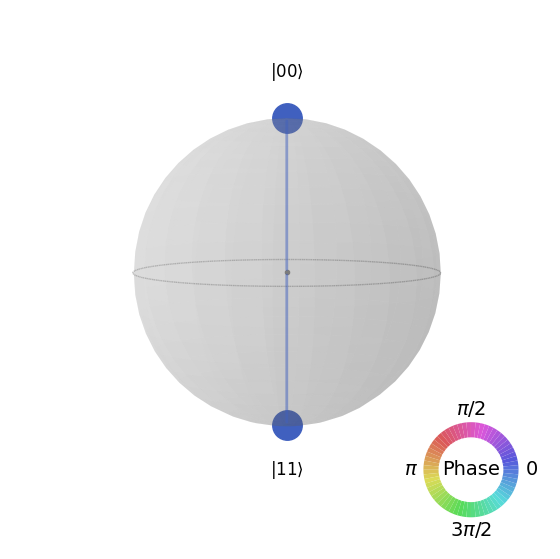

In [19]:
from qiskit.visualization import plot_state_qsphere

state = Statevector([1/np.sqrt(2),0,0,1/np.sqrt(2)])
plot_state_qsphere(state)

Inspecciona las opciones de esta visualizacion,crea una figura con un determinada tamaño y guarda en un fichero la imagen obtenida con el metodo.`savefig('out.png')`

In [20]:
# **figsize** (tuple): tamaño de la figura (anchura, altura)


## Visualizacion de Operadores: City, PauliVec y Hinton

Esta visualizacion toma un vector de estados como entrada o un operador (matriz) y visualiza los valores de la matriz en cada caso. Para el caso de tomar un vector de estados, se calcula su matriz de densidad y es esta la que se representa.

Podemos guardar la matriz que representa el Operador de un `QuantumCircuit` con el metodo `save_unitary` y representarlo con estas visualizaciones.

Ten en cuenta que el circuito no puede contener medidas, pues las medidas no son operaciones unitarias y no pueden ser parte de un operador.

#### EJERCICIO

Inspecciona las funciones de visualizacion de operadores:

*  [plot_state_city](https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_state_city#qiskitvisualizationplot_state_city). La visualizacion estandar de operadores como matrices con parte real e imaginaria

*  [plot_state_paulivec](https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_state_paulivec#qiskitvisualizationplot_state_paulivec) La representacion del operador expresado sobre la base de los operadores de Pauli $\rho=\sum_{q=0}^{d^2-1}p_jP_j/d$.

* [plot_state_hinton](https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_state_hinton#qiskitvisualizationplot_state_hinton) Lo mismo que `'city'` pero con el tamaño del elemento representando su valor en la matriz del operador.

Y visualiza como se representa la matriz de densidad del estado entrelazado de Bell de 2 qubits  $\frac{1}{\sqrt(2)}(|00>+|11>)$

Para ello crea un circuito que genere este estado y guarda la matriz unitaria en lugar de realizar la medida.
Ejecuta el simulador y recupera la matriz unitaria del resultado de la simulacion pra mostrarla en las visualizaciones

In [21]:
# Creamos el circuito sin medidas
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)

# Guardar un circuito como un operador unitario -> circuit.save_unitary()
circ.save_unitary()

#simular y obtener el operador unitario de los resultados -> result.get_unitary()
simulador = Aer.get_backend("aer_simulator")
result = simulador.run(circ).result()
unitary = result.get_unitary()

Crear las visualizaciones

In [22]:
from qiskit.visualization import plot_state_city, plot_state_paulivec, plot_state_hinton

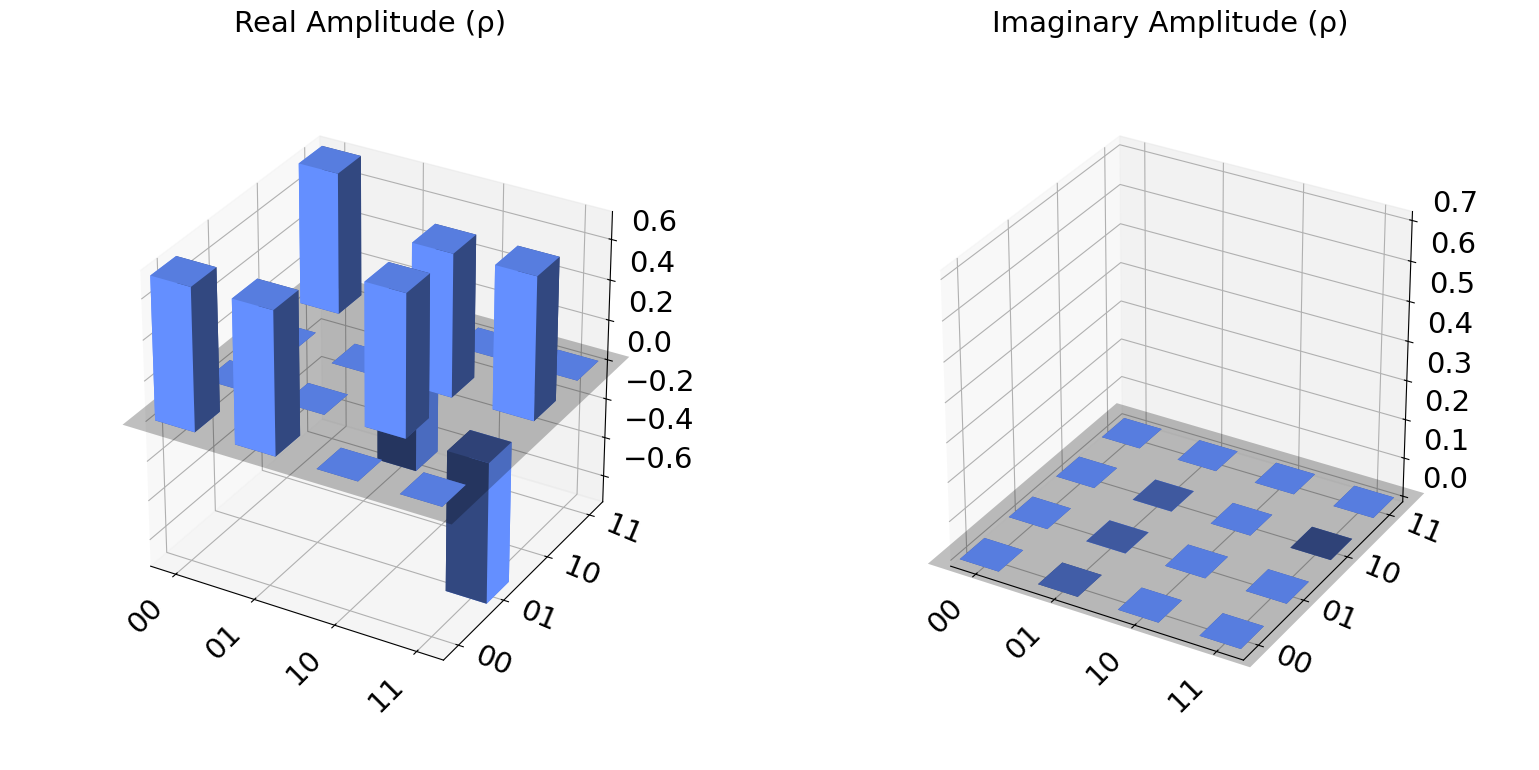

In [23]:
#state_city
plot_state_city(unitary)

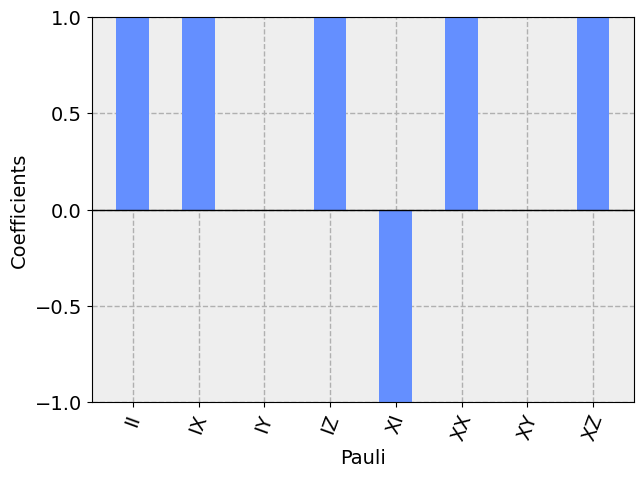

In [24]:
#state_paulivec
plot_state_paulivec(unitary)

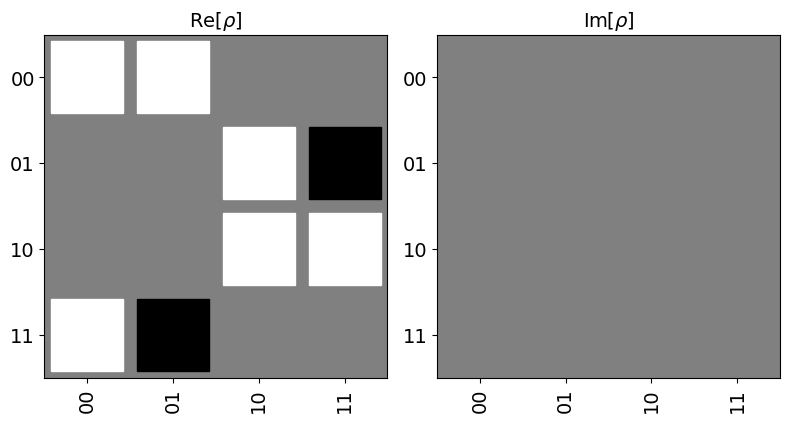

In [25]:
#state_hinton
plot_state_hinton(unitary)

#### EJERCICIO

Investiga las opciones de estas visualizacione cmabiando algunos de los parametros por defecto.

**plot_state_city()** opciones

- **title** (str): una cadena (string) representando el titulo de la figura
- **figsize** (tuple): tamaño de la figura en pulgadas (anchura, altura)
- **color** (list): a lista de len=2 para colorear las partes real e imaginaria de los elementos de la matriz

**plot_state_hinton()** opciones

- **title** (str): una cadena (string) representando el titulo de la figura
- **figsize** (tuple): tamaño de la figura en pulgadas (anchura, altura)

**plot_state_paulivec()** opciones

- **title** (str): una cadena (string) representando el titulo de la figura
- **figsize** (tuple): tamaño de la figura en pulgadas (anchura, altura)
- **color** (list): a lista de len=2 para colorear las partes real e imaginaria de los elementos de la matriz

Las figuras pueden igualmente guardarse en disco con el metodo`.savefig('out.png')`